<a href="https://colab.research.google.com/github/Kimi-chuheng/Apple-Stock-Prediction/blob/main/APPLE_newest_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data wrangling

In [ ]:
#Import the file AppleStockPrice
df_price=pd.read_csv('AppleStockPrice.csv')
df_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-12-1980,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1,15-12-1980,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
2,16-12-1980,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
3,17-12-1980,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
4,18-12-1980,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


In [ ]:
#check for duplicate samples
df_price.duplicated().sum()

0

In [ ]:
#check for missing values
df_price.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
#Define the column Date
df_price['Date'] = pd.to_datetime(df_price['Date'], format='%d-%m-%Y')

In [ ]:
#Calculate the average values for features
summary = {
    'Average Open': df_price['Open'].mean(),
    'Average High': df_price['High'].mean(),
    'Average Low': df_price['Low'].mean(),
    'Average Close': df_price['Close'].mean(),
    'Average Adj Close': df_price['Adj Close'].mean(),
    'Average Volume': df_price['Volume'].mean()
}

summary_df = pd.DataFrame(summary, index=[0])

summary_df

,Average Open,Average High,Average Low,Average Close,Average Adj Close,Average Volume
0,22.966207,23.213849,22.728776,22.981462,22.16584,3.172052e+08


##Structuring data

In [ ]:
#Calculate and display the correlation matrix between the specified columns of the df_price_std DataFrame
df_price[['Volume','Adj Close','Open']].corr()

,Volume,Adj Close,Open
Volume,1.000000,-0.259199,-0.257652
Adj Close,-0.259199,1.000000,0.999674
Open,-0.257652,0.999674,1.000000


##Enriching data

In [ ]:
df_dividend=pd.read_csv('AppleStockDividend.csv')
df_dividend.head(5)

,Date,Dividends
0,1987-05-11,0.000536
1,1987-08-10,0.000536
2,1987-11-17,0.000714
3,1988-02-12,0.000714
4,1988-05-16,0.000714


In [ ]:
df_dividend['Date'] = pd.to_datetime(df_dividend['Date'])

In [ ]:
#check for duplicate samples
df_dividend.duplicated().sum()

0

In [ ]:
#check for missing values
df_dividend.isnull().sum()

,0
Date,0
Dividends,0


In [ ]:
df_split=pd.read_csv('AppleStockSplit.csv')
df_split

,Date,Stock Splits
0,1987-06-16,2:1
1,2000-06-21,2:1
2,2005-02-28,2:1
3,2014-06-09,7:1
4,2020-08-31,4:1


In [ ]:
df_split['Date'] = pd.to_datetime(df_split['Date'])

In [ ]:
#inner merge
combined_table1= pd.merge(df_price, df_dividend, on='Date', how='left')
combined_table=pd.merge(combined_table1, df_split, on='Date', how='left')
combined_table

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11030,2024-09-16,216.540000,217.220000,213.920000,216.320000,216.320000,59357400,NaN,NaN
11031,2024-09-17,215.750000,216.900000,214.500000,216.790000,216.790000,45519300,NaN,NaN
11032,2024-09-18,217.550000,222.710000,217.540000,220.690000,220.690000,59894900,NaN,NaN
11033,2024-09-19,224.990000,229.820000,224.630000,228.870000,228.870000,66781300,NaN,NaN


#Data Exploring

* Date: Date of the trading day and Ex-dividend date (record date).
* Open: Stock price at market open.
* High: Highest stock price during the trading day.
* Low: Lowest stock price during the trading day.
* Close: Stock price at market close.
* Adj Close: Adjusted closing price accounting for dividends and stock splits.
* Volume: Number of shares traded.
* Dividends: Dividends per stock in USD.


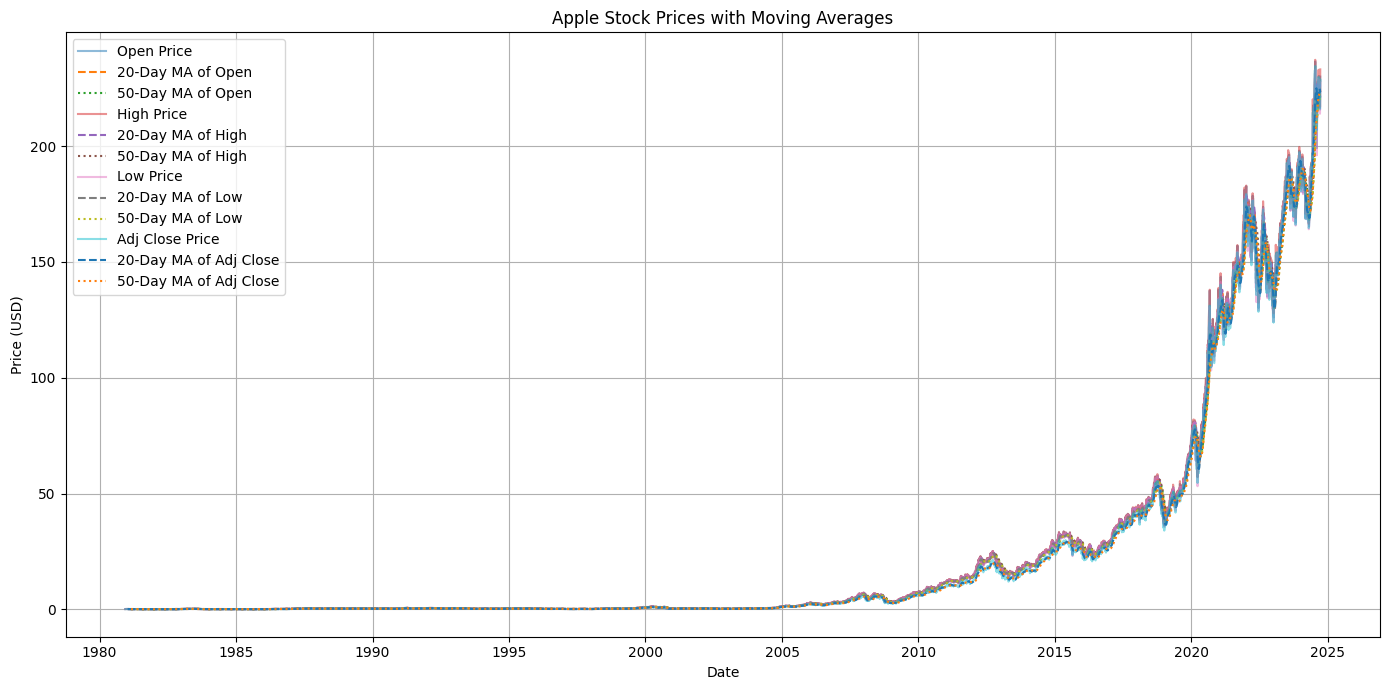

In [ ]:
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    combined_table[f'MA_20_{column}'] = combined_table[column].rolling(window=20).mean()
    combined_table[f'MA_50_{column}'] = combined_table[column].rolling(window=50).mean()

plt.figure(figsize=(14, 7))

for column in ['Open', 'High', 'Low', 'Adj Close']:

    sns.lineplot(x='Date', y=column, data=combined_table, label=f'{column} Price', alpha=0.5)

    sns.lineplot(x='Date', y=f'MA_20_{column}', data=combined_table, label=f'20-Day MA of {column}', linestyle='--')

    sns.lineplot(x='Date', y=f'MA_50_{column}', data=combined_table, label=f'50-Day MA of {column}', linestyle=':')

plt.title('Apple Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

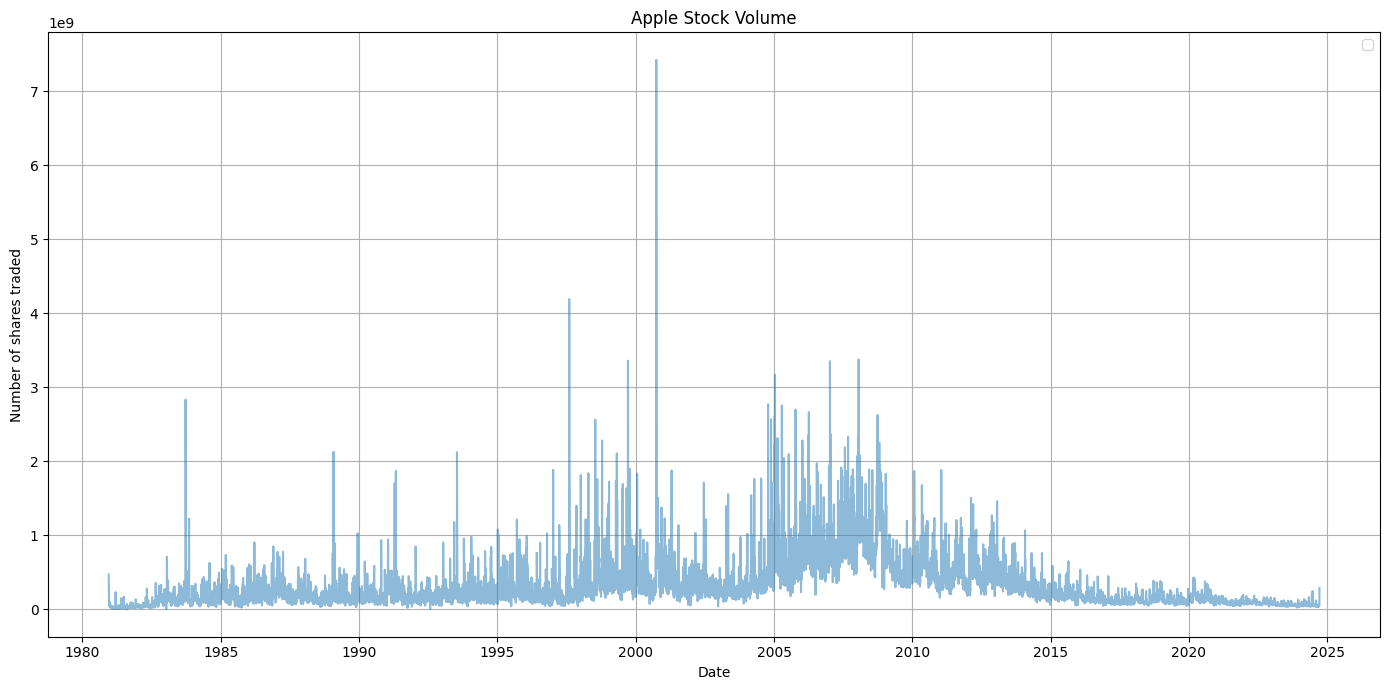

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Volume', data=combined_table, alpha=0.5)
plt.title('Apple Stock Volume')
plt.xlabel('Date')
plt.ylabel('Number of shares traded')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

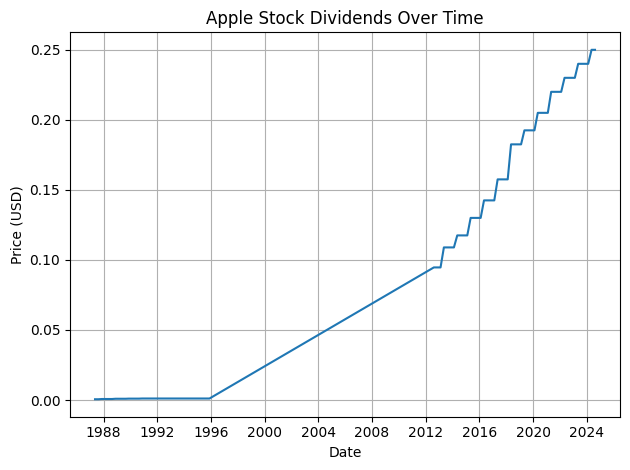

In [ ]:
sns.lineplot(x='Date',y='Dividends',data=combined_table);
plt.title('Apple Stock Dividends Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid()
plt.tight_layout()
plt.show()

#Modeling(linear and LSTM)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.regularizers import l2

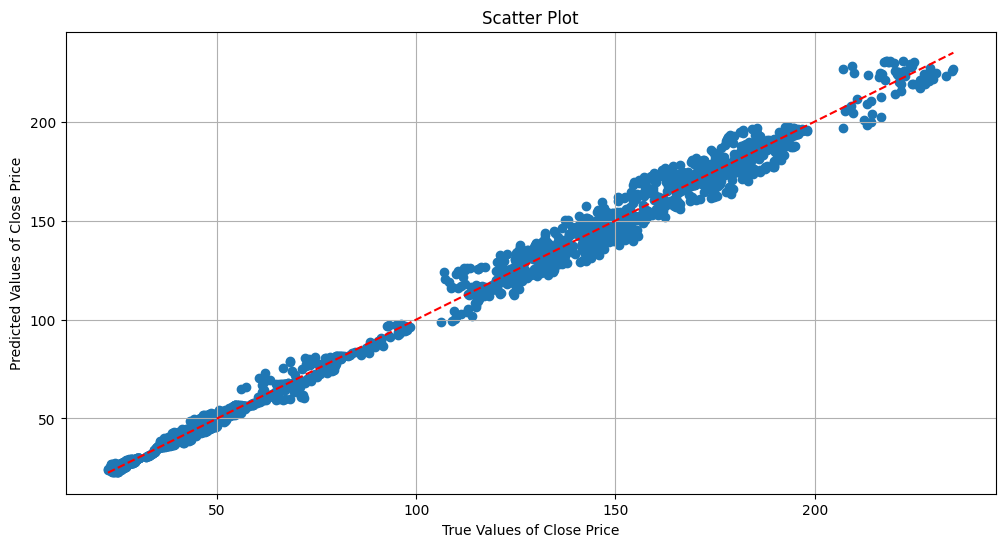

MSE of prediction is 0.009425735793959566
R2 of prediction is 0.9943579427813433


In [ ]:

scaler = StandardScaler()

combined_table['Std Close'] = scaler.fit_transform(combined_table[['Close']])

combined_table['Std MA_20'] = combined_table['Std Close'].rolling(window=20).mean()
combined_table['Std MA_50'] = combined_table['Std Close'].rolling(window=50).mean()
model_table = combined_table.dropna(subset=['Std MA_50'])
X = model_table[['Std MA_20', 'Std MA_50']]
y = model_table['Std Close']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

y_test_pred_original = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

results = pd.DataFrame({
    'Actual Cost': y_test_original,
    'Predicted Cost': y_test_pred_original
})


plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.scatter(y_test_original, y_test_pred_original)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--')
plt.title('Scatter Plot')
plt.xlabel('True Values of Close Price')
plt.ylabel('Predicted Values of Close Price')
plt.grid(True)
plt.show()

print(f'MSE of prediction is {mse_test}')
print(f'R2 of prediction is {r2_test}')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input,Dropout, BatchNormalization,Activation,Bidirectional
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [ ]:
day=60    #LSTM will consider this number of days before and predict the next day
model_table1 = df_price.copy()
features1=['Open','High','Low','Close','Adj Close']
features=['Open','High','Low','Close','Adj Close']
for column in features1:
    ma_day = model_table1[column].rolling(window=day).mean()

    model_table1[f'MSE_{day}_{column}'] = (model_table1[column] - ma_day) ** 2
    features.append(f'MSE_{day}_{column}')

model_table = model_table1.iloc[day:]
scaler = MinMaxScaler(feature_range=(0, 1))
#df_filtered = model_table[model_table['Date'].dt.year >= 2010]
model_data = scaler.fit_transform(model_table[features])

In [ ]:
model_table.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MSE_60_Open,MSE_60_High,MSE_60_Low,MSE_60_Close,MSE_60_Adj Close
60,1981-03-11,0.097656,0.097656,0.096540,0.096540,0.074422,29859200,0.000996,0.001017,0.001043,0.001043,0.000620
61,1981-03-12,0.100446,0.101004,0.100446,0.100446,0.077434,59248000,0.000807,0.000795,0.000786,0.000786,0.000467
62,1981-03-13,0.099888,0.099888,0.099330,0.099330,0.076573,231302400,0.000826,0.000846,0.000837,0.000837,0.000498
63,1981-03-16,0.103237,0.104353,0.103237,0.103237,0.079585,37228800,0.000635,0.000596,0.000616,0.000616,0.000366
64,1981-03-17,0.108259,0.109375,0.108259,0.108259,0.083457,43747200,0.000400,0.000370,0.000385,0.000385,0.000229


In [ ]:
X = []
y = []
for i in range(day, len(model_data)):
    X.append(model_data[i-day:i])
    y.append(model_data[i])
X = np.array(X)
y = np.array(y)
print("X shape:", X.shape)

# seperate
train_size = int(len(X) * 0.8)
X_train, X_1 = X[:train_size], X[train_size:]
y_train, y_1 = y[:train_size], y[train_size:]
cv_size = int(len(X_1) * 0.5)
X_cv, X_test = X_1[:cv_size], X_1[cv_size:]
y_cv, y_test = y_1[:cv_size], y_1[cv_size:]
# adjust shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))  # (samples, 60, 6)
X_cv  = np.reshape(X_cv, (X_cv.shape[0], X_cv.shape[1], X_cv.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))      # (samples, 60, 6)


# LSTM
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(20, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1]))

model.compile(optimizer='adam', loss='mean_squared_error')

# earlystopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# training
model.fit(X_train, y_train, epochs=10, batch_size=50, validation_data=(X_cv, y_cv), callbacks=[early_stopping])



X shape: (10915, 60, 10)
Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 3.1616e-04 - val_loss: 5.8011e-04
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 5.7474e-05 - val_loss: 3.7634e-04
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 3.8626e-05 - val_loss: 2.4046e-04
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 3.4379e-05 - val_loss: 3.5735e-04
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 2.6959e-05 - val_loss: 3.3081e-04


In [ ]:
predictions_cv = model.predict(X_cv)
predictions_cv_ori = scaler.inverse_transform(predictions_cv)

predictions_cv_ori = predictions_cv_ori[:, :len(features1)]


predictions_cv_ori = pd.DataFrame(predictions_cv_ori, columns=features1)

predictions_cv_ori.tail()
#predictions_cv_ori.head()

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


,Open,High,Low,Close,Adj Close
1086,75.185173,71.607384,71.647041,74.687859,66.698341
1087,76.031036,72.174324,71.765297,75.151230,67.549500
1088,76.356331,72.357681,71.845116,75.310776,67.412117
1089,76.414734,72.508163,71.953430,75.285942,66.967598
1090,76.962616,72.577133,71.936287,75.646973,67.816849


In [ ]:
y_cv_ori = scaler.inverse_transform(y_cv)
y_cv_ori = y_cv_ori[:, :len(features1)]


y_cv_ori = pd.DataFrame(y_cv_ori, columns=features1)

y_cv_ori.tail()
#y_cv1_ori.head()

,Open,High,Low,Close,Adj Close
1086,78.037498,78.987503,75.802498,76.912498,75.027069
1087,76.127502,77.447502,75.382500,77.385002,75.487999
1088,75.087502,76.974998,75.052498,76.927498,75.041695
1089,78.292503,79.125000,77.580002,78.739998,76.809769
1090,78.757500,79.629997,78.252502,78.285004,76.365936


In [ ]:

r2_scores = []
mse_scores = []

for column in y_cv_ori.columns:
    r2 = r2_score(y_cv_ori[column], predictions_cv_ori[column])
    r2_scores.append(r2)
    mse = mean_squared_error(y_cv_ori[column], predictions_cv_ori[column])
    mse_scores.append(mse)
average_r2 = np.mean(r2_scores)
average_mse = np.mean(mse_scores)
print("R² Scores for each column:", r2_scores)
print("MSE Scores for each column:", mse_scores)
print("Average R² Score from cross-validation:", average_r2)
print("Average MSE Score from cross-validation:", average_mse)

R² Scores for each column: [0.9877454379867614, 0.9722598319648129, 0.9748955948075702, 0.9890182280701278, 0.8930566282365252]
MSE Scores for each column: [2.436002258672278, 5.697865406457205, 4.869824808316336, 2.1997275122693356, 21.540844078665437]
Average R² Score from cross-validation: 0.9633951442131595
Average MSE Score from cross-validation: 7.3488528128761175


In [ ]:
predictions_test = model.predict(X_test)
predictions_test_ori = scaler.inverse_transform(predictions_test)
predictions_test_ori = predictions_test_ori[:, :len(features1)]


predictions_test_ori = pd.DataFrame(predictions_test_ori, columns=features1)
predictions_test_ori.tail()
#predictions_test_ori.head()

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


,Open,High,Low,Close,Adj Close
1087,179.099152,180.041946,198.678299,192.729630,152.357147
1088,178.678574,179.906845,196.868195,191.477402,152.201004
1089,178.072433,179.709366,195.728668,190.431763,151.784378
1090,177.369919,179.363998,196.155380,190.330002,151.250015
1091,177.728348,179.122940,197.287247,191.187408,151.289017


In [ ]:
y_test_ori = scaler.inverse_transform(y_test)
y_test_ori = scaler.inverse_transform(y_test)
y_test_ori = y_test_ori[:, :len(features1)]


y_test_ori = pd.DataFrame(y_test_ori, columns=features1)
y_test_ori.tail()
#y_test_ori.head()

,Open,High,Low,Close,Adj Close
1087,216.54,217.22,213.92,216.32,216.32
1088,215.75,216.90,214.50,216.79,216.79
1089,217.55,222.71,217.54,220.69,220.69
1090,224.99,229.82,224.63,228.87,228.87
1091,229.97,233.09,227.62,228.20,228.20


In [ ]:
r2_scores = []
mse_scores = []
for column in y_test_ori.columns:
    r2 = r2_score(y_test_ori[column], predictions_test_ori[column])
    r2_scores.append(r2)
    mse = mean_squared_error(y_test_ori[column], predictions_test_ori[column])
    mse_scores.append(mse)

average_r2 = np.mean(r2_scores)
average_mse = np.mean(mse_scores)
print("R² Scores for each column:", r2_scores)
print("MSE Scores for each column:", mse_scores)
print("Average R² Score from test:", average_r2)
print("Average MSE Score from test:", average_mse)

R² Scores for each column: [0.5998601332519659, -0.026780565634854536, 0.24031009913165247, 0.6250998256969538, -0.23621153027654174]
MSE Scores for each column: [386.6039432347572, 1000.9878105712063, 728.8511251667999, 362.92482901531116, 1244.4533688819263]
Average R² Score from test: 0.24045559243383519
Average MSE Score from test: 744.7642153740002


In [ ]:
#future prediction
last_days = model_data[-day:]
future_predictions = []

for _ in range(10):

    input_data = last_days.reshape((1, last_days.shape[0], last_days.shape[1]))  # (1, day, features)


    pred = model.predict(input_data)


    future_predictions.append(pred[0])


    last_days = np.append(last_days, pred, axis=0)[1:]


future_predictions = np.array(future_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [ ]:
future_predictions_ori = scaler.inverse_transform(future_predictions)
future_predictions_ori = future_predictions_ori[:, :len(features1)]


future_predictions_ori = pd.DataFrame(future_predictions_ori, columns=features1)
future_predictions_ori.head()

,Open,High,Low,Close,Adj Close
0,178.576859,179.423874,198.143509,192.176819,152.245636
1,176.070587,176.023468,187.337128,185.213516,149.978729
2,172.402802,172.828583,179.582550,178.973572,145.489166
3,168.465195,169.325256,172.783936,173.259888,141.492096
4,164.399033,165.641510,166.772583,167.963409,137.823914


#Combine with sentiment analysis

##First trial(Bidirectional LSTM and sentiment analysis)
I tried using data collected from the Apple website through the API and found that it contained too many dates with sentiment values of 0. Therefore, I attempted to combine this with a dataset from kaggle (from 2015 to 2023) and part of my own dataset (for 2024), but ultimately the results were still unsatisfactory.

In [ ]:
df_news_self=pd.read_csv('apple_news_from_myself.csv')
df_news_self.head()

,Title,Time
0,Apple debuts the first scripted film captured ...,"October 10, 2024"
1,Apple’s Swift Student Challenge to open in Feb...,"October 8, 2024"
2,Apple Podcasts spotlights narrative series,"October 1, 2024"
3,"Apple launches new resources for teachers, exp...","October 1, 2024"
4,"The iPhone 16 lineup, AirPods 4, Apple Watch S...","September 20, 2024"


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

news_title = df_news_self['Title']

def get_sentiment_scores(titles):
    sentiment_scores = []
    for title in titles:
        score = sid.polarity_scores(title)
        sentiment_scores.append(score['compound'])
    return sentiment_scores
sentiment_scores = get_sentiment_scores(news_title)
df_news_self['Sentiment Scores']=sentiment_scores

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_news_self.head()

,Title,Time,Sentiment Scores
0,Apple debuts the first scripted film captured ...,"October 10, 2024",0.0000
1,Apple’s Swift Student Challenge to open in Feb...,"October 8, 2024",0.2732
2,Apple Podcasts spotlights narrative series,"October 1, 2024",0.0000
3,"Apple launches new resources for teachers, exp...","October 1, 2024",0.4404
4,"The iPhone 16 lineup, AirPods 4, Apple Watch S...","September 20, 2024",0.0000


In [ ]:
df_news_self.shape

(2276, 3)

In [ ]:
zero_score_count = (df_news_self['Sentiment Scores'] == 0).sum()
zero_score_count

1506

I found that the Apple news I collected myself from https://www.apple.com/newsroom/archive/does not always contain emotional information, which is normal because I sourced it from the official Apple site, where the news is more technical. Therefore, I decided to use the dataset from Kaggle ,while for data in 2024,which is the missing
part of this online dataset,I choose to use my own data

Link of this dataset:https://www.kaggle.com/datasets/bhavikshangari/apple-stock-price-and-news-2015-2023/data








In [ ]:
df_news_online = pd.read_csv('daily_apple_news1_from_kaggle.csv')
df_news_online.shape

(2223, 2)

In [ ]:
#rearrange the 'Date' feature
df_news_online['Date'] = pd.to_datetime(df_news_online['Date'], errors='coerce')

df_news_self['Date'] = pd.to_datetime(df_news_self['Time'], errors='coerce')
df_news_self=df_news_self.drop(columns=['Time', 'Sentiment Scores'])
df_news_self = df_news_self.sort_values(by='Date')
df_news_self = df_news_self.rename(columns={'Title': 'News'})

In [ ]:
#filter the data from myself based on years
df_news_self_2024 = df_news_self[df_news_self['Date'].dt.year == 2024]
#Combine the results
df_news = pd.concat([df_news_online, df_news_self_2024], ignore_index=True)
print(df_news.head())
print(df_news.tail())

                 Date                                               News
0 2015-01-02 09:30:00  ["Is Xiaomi's first laptop a MacBook Air knock...
1 2015-01-05 09:30:00  ["Is Xiaomi's first laptop a MacBook Air knock...
2 2015-01-06 09:30:00  ["Is Xiaomi's first laptop a MacBook Air knock...
3 2015-01-07 09:30:00  ['The Apple Watch is going to be a flop, says ...
4 2015-01-08 09:30:00  ["Chinese market outsells US in sale of iPhone...
           Date                                               News
2346 2024-09-20  The iPhone 16 lineup, AirPods 4, Apple Watch S...
2347 2024-10-01  Apple launches new resources for teachers, exp...
2348 2024-10-01         Apple Podcasts spotlights narrative series
2349 2024-10-08  Apple’s Swift Student Challenge to open in Feb...
2350 2024-10-10  Apple debuts the first scripted film captured ...


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

news_title = df_news['News']

def get_sentiment_scores(titles):
    sentiment_scores = []
    for title in titles:
        score = sid.polarity_scores(title)
        sentiment_scores.append(score['compound'])
    return sentiment_scores
sentiment_scores = get_sentiment_scores(news_title)
df_news['Sentiment Scores']=sentiment_scores

In [ ]:
df_news['Date'] = pd.to_datetime(df_news['Date'], errors='coerce')
df_news['Date'] = df_news['Date'].dt.date

df_news['Sentiment Scores'] = df_news['Sentiment Scores'].replace(0, pd.NA)
df_news['Sentiment Scores'] = df_news['Sentiment Scores'].ffill()
#these steps replaced the 0 values of sentiment scores with the closest day before which has non zero

df_news['Date'] = pd.to_datetime(df_news['Date'], errors='coerce')#I don't know,just make sure it can merge with the model_table later
df_news = df_news.dropna()#Because the first three rows are NA

In [ ]:
df_news.head()

,Date,News,Sentiment Scores
3,2015-01-07,"['The Apple Watch is going to be a flop, says ...",-0.1531
4,2015-01-08,"[""Chinese market outsells US in sale of iPhone...",0.7906
5,2015-01-09,"Xiaomi's buying spree gives Apple, Samsung mor...",0.7906
6,2015-01-12,['Apple India to halve credit period and slash...,0.0258
7,2015-01-13,Zomato to buy US food portal Urbanspoon for $6...,0.0258


In [ ]:
zero_score_count = (df_news['Sentiment Scores'] == 0).sum()
zero_score_count

0

In [ ]:
day=30    #LSTM will consider this number of days before and predict the next day
model_table1 = df_price.copy()
features1=['Open','High','Low','Close','Adj Close']
features=['Open','High','Low','Close','Adj Close','Sentiment Scores']#Add Sentiment Scores to model features
for column in features1:
    ma_day = model_table1[column].rolling(window=day).mean()

    model_table1[f'MSE_{day}_{column}'] = (model_table1[column] - ma_day) ** 2
    features.append(f'MSE_{day}_{column}')

model_table = model_table1.iloc[day:]
scaler = MinMaxScaler(feature_range=(0, 1))

model_table_senti=pd.merge(model_table,df_news, on='Date', how='inner')

df_filtered = model_table_senti[model_table_senti['Date'].dt.year >= 2015]#Because the sentiment data are only contains information after 1/1/2015
model_data = scaler.fit_transform(df_filtered[features])

In [ ]:
model_df=pd.DataFrame(model_data, columns=[features])
model_df.tail()#here shown the data for modeling


,Open,High,Low,Close,Adj Close,Sentiment Scores,MSE_30_Open,MSE_30_High,MSE_30_Low,MSE_30_Close,MSE_30_Adj Close
2336,0.906814,0.906632,0.909027,0.914643,0.916550,0.622763,0.034209,0.071723,0.044773,0.059062,0.059936
2337,0.906814,0.906632,0.909027,0.914643,0.916550,0.715308,0.034209,0.071723,0.044773,0.059062,0.059936
2338,0.906814,0.906632,0.909027,0.914643,0.916550,0.715308,0.034209,0.071723,0.044773,0.059062,0.059936
2339,0.946303,0.965424,0.959852,0.973892,0.975357,0.715308,0.008993,0.051321,0.030481,0.071318,0.072505
2340,0.969577,0.980682,0.974042,0.970729,0.972218,0.715308,0.075300,0.115473,0.076583,0.045801,0.046360


X shape: (2311, 30, 11)
Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - loss: 0.1984 - val_loss: 0.1272
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 0.1104 - val_loss: 0.0805
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0668 - val_loss: 0.0512
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0422 - val_loss: 0.0344
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0268 - val_loss: 0.0275
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.0198 - val_loss: 0.0215
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0161 - val_loss: 0.0187
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0141 - val_loss: 0.0168
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0119 - val_loss: 0.0171
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0118 - val_loss: 0.0157
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0114 - val_loss: 0.0158
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━

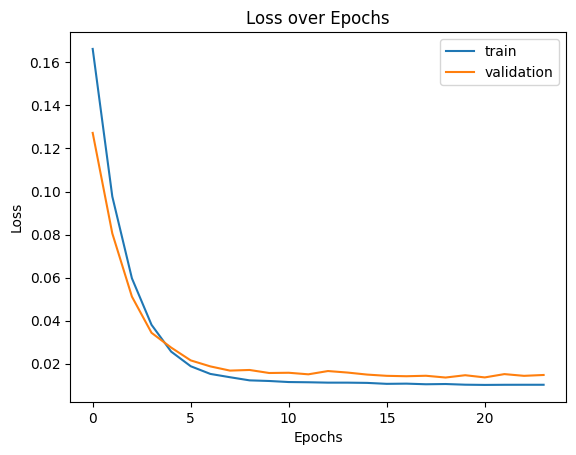

In [ ]:
X = []
y = []
for i in range(day, len(model_data)):
    X.append(model_data[i-day:i])
    y.append(model_data[i])
X = np.array(X)
y = np.array(y)
print("X shape:", X.shape)

# seperate
train_size = int(len(X) * 0.8)
X_train, X_1 = X[:train_size], X[train_size:]
y_train, y_1 = y[:train_size], y[train_size:]
cv_size = int(len(X_1) * 0.5)
X_cv, X_test = X_1[:cv_size], X_1[cv_size:]
y_cv, y_test = y_1[:cv_size], y_1[cv_size:]
# adjust shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))  # (samples, 60, 6)
X_cv  = np.reshape(X_cv, (X_cv.shape[0], X_cv.shape[1], X_cv.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))      # (samples, 60, 6)


model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(25)))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1], kernel_regularizer=l2(0.01)))  # L2 normalization


model.compile(optimizer='adam', loss='mean_squared_error')


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_cv, y_cv), callbacks=[early_stopping])

#plot the loss over epoches
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In fact, both the training set and the cross-validation set losses don't seem small (compared to the previous model without sentiment analysis).

In [ ]:
predictions_cv = model.predict(X_cv)
predictions_cv_ori = scaler.inverse_transform(predictions_cv)

predictions_cv_ori = predictions_cv_ori[:, :len(features1)]

predictions_cv_ori = pd.DataFrame(predictions_cv_ori, columns=features1)

predictions_cv_ori.tail()
#predictions_cv_ori.head()

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


,Open,High,Low,Close,Adj Close
226,157.721329,159.911789,156.060699,158.136734,156.064667
227,157.683014,159.881256,156.083405,158.074554,156.048737
228,157.793045,160.002716,156.174866,158.176590,156.147125
229,157.889603,160.108353,156.230240,158.270813,156.222076
230,157.807480,160.023254,156.181259,158.190399,156.157120


In [ ]:
y_cv_ori = scaler.inverse_transform(y_cv)
y_cv_ori = y_cv_ori[:, :len(features1)]

y_cv_ori = pd.DataFrame(y_cv_ori, columns=features1)

y_cv_ori.tail()
#y_cv1_ori.head()

,Open,High,Low,Close,Adj Close
226,171.710007,172.929993,170.419998,172.690002,171.579147
227,173.000000,175.240005,172.580002,175.050003,173.923965
228,176.389999,176.389999,174.940002,175.160004,174.033249
229,173.979996,174.710007,173.449997,174.199997,173.079422
230,173.130005,173.380005,171.279999,171.559998,170.456406


In [ ]:
r2_scores = []
mse_scores = []

for column in y_cv_ori.columns:
    r2 = r2_score(y_cv_ori[column], predictions_cv_ori[column])
    r2_scores.append(r2)
    mse = mean_squared_error(y_cv_ori[column], predictions_cv_ori[column])
    mse_scores.append(mse)
average_r2 = np.mean(r2_scores)
average_mse = np.mean(mse_scores)
print("R² Scores for each column:", r2_scores)
print("MSE Scores for each column:", mse_scores)
print("Average R² Score from cross-validation:", average_r2)
print("Average MSE Score from cross-validation:", average_mse)

R² Scores for each column: [0.3189042400081292, 0.31137050577781233, 0.29383103924793086, 0.2985033620260552, 0.28320282640450767]
MSE Scores for each column: [97.14554316245511, 94.41430568013028, 105.18640618561331, 100.93995139843292, 102.39750614688275]
Average R² Score from cross-validation: 0.3011623946928871
Average MSE Score from cross-validation: 100.01674251470287


In [ ]:

predictions_test = model.predict(X_test)
predictions_test_ori = scaler.inverse_transform(predictions_test)
predictions_test_ori = predictions_test_ori[:, :len(features1)]

predictions_test_ori = pd.DataFrame(predictions_test_ori, columns=features1)
predictions_test_ori.tail()
#predictions_test_ori.head()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


,Open,High,Low,Close,Adj Close
227,160.127075,162.338516,158.552094,160.555115,158.512115
228,160.087448,162.296951,158.508438,160.514893,158.469315
229,160.096390,162.307022,158.519226,160.523300,158.479019
230,160.047943,162.258652,158.472168,160.474915,158.431030
231,160.051697,162.261856,158.476669,160.480408,158.434509


In [ ]:
y_test_ori = scaler.inverse_transform(y_test)
y_test_ori = scaler.inverse_transform(y_test)
y_test_ori = y_test_ori[:, :len(features1)]

y_test_ori = pd.DataFrame(y_test_ori, columns=features1)
y_test_ori.tail()
#y_test_ori.head()

,Open,High,Low,Close,Adj Close
227,216.54,217.22,213.92,216.32,216.32
228,216.54,217.22,213.92,216.32,216.32
229,216.54,217.22,213.92,216.32,216.32
230,224.99,229.82,224.63,228.87,228.87
231,229.97,233.09,227.62,228.20,228.20


In [ ]:
r2_scores = []
mse_scores = []
for column in y_test_ori.columns:
    r2 = r2_score(y_test_ori[column], predictions_test_ori[column])
    r2_scores.append(r2)
    mse = mean_squared_error(y_test_ori[column], predictions_test_ori[column])
    mse_scores.append(mse)

average_r2 = np.mean(r2_scores)
average_mse = np.mean(mse_scores)
print("R² Scores for each column:", r2_scores)
print("MSE Scores for each column:", mse_scores)
print("Average R² Score from test:", average_r2)
print("Average MSE Score from test:", average_mse)

R² Scores for each column: [-3.405279130867168, -3.284765975482875, -3.6680475321828263, -3.366175806677929, -3.624374181308043]
MSE Scores for each column: [1295.8287396845205, 1244.7607161178655, 1281.2115213584639, 1250.9487068515466, 1362.6429778842132]
Average R² Score from test: -3.4697285253037684
Average MSE Score from test: 1287.078532379322


##Second trial with another dataset from kaggle
https://www.kaggle.com/datasets/lorilaz/apple-news-headline-sentiment-and-stock-info

In [ ]:
data_2=pd.read_csv('aaplCombined2_from_kaggle.csv')
data_2.head(20)

,Date,compound,Low,Open,Volume,High,Close,Adjusted Close
0,12-01-06,0.7707,3.217857,3.278571,795079600,3.297500,3.261429,2.809276
1,12-04-06,0.8720,3.232143,3.281429,709536800,3.287500,3.254286,2.803123
2,12-05-06,0.0000,3.245357,3.273214,662838400,3.297500,3.259643,2.807738
3,12-06-06,0.6858,3.202500,3.237143,638184400,3.263929,3.208214,2.763438
4,12-07-06,-0.6712,3.103571,3.215357,1004827600,3.232143,3.108571,2.677609
5,12-08-06,-0.1796,3.107143,3.115357,784277200,3.192500,3.152143,2.715141
6,12-11-06,-0.8743,3.144643,3.175000,499780400,3.189286,3.169643,2.730214
7,12-12-06,0.0000,3.054643,3.164643,1026620000,3.172857,3.076429,2.649923
8,13-12-06,0.9360,3.112500,3.141071,857052000,3.181071,3.180357,2.739443
9,14-12-06,0.9620,3.152143,3.180357,832330800,3.214286,3.162500,2.724062


Actually this is weird that exist the future information,or if it means
Day-Month-Year,but when I check the original dataset,it become more weird

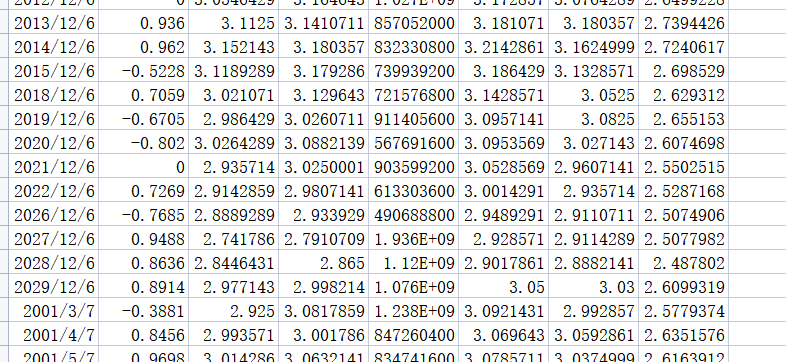